In [ ]:
import requests
import pandas as pd

api_key = '___'
symbol = 'TSLA'

url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}&serietype=line'

response = requests.get(url)
data = response.json()

# 데이터프레임으로 변환
prices = pd.DataFrame(data['historical'])
print(prices.head())

         date   close
0  2025-05-13  323.84
1  2025-05-12  318.38
2  2025-05-09  298.26
3  2025-05-08  284.82
4  2025-05-07  276.22


In [17]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(r.text, 'html.parser')

tables = soup.find_all('table')

# 두 번째 table을 tesla revenue로 사용
df = pd.read_html(str(tables[1]))[0]

df.columns = ['Date', 'Revenue']
df['Revenue'] = df['Revenue'].replace({'\$': '', ',': ''}, regex=True)
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

tesla_revenue = df.dropna()
print(tesla_revenue.tail())

          Date  Revenue
58  2010-09-30     31.0
59  2010-06-30     28.0
60  2010-03-31     21.0
62  2009-09-30     46.0
63  2009-06-30     27.0


In [ ]:
import requests
import pandas as pd

api_key = '___'
symbol = 'GME'

url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}&serietype=line'

response = requests.get(url)
data = response.json()

gme_data = pd.DataFrame(data['historical'])
gme_data = gme_data.reset_index(drop=True)

print(gme_data.head())


         date  close
0  2025-05-13  28.40
1  2025-05-12  28.05
2  2025-05-09  27.54
3  2025-05-08  26.78
4  2025-05-07  26.01


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(r.text, 'html.parser')

tables = soup.find_all('table')

# 보통 두 번째 table이 revenue table
df = pd.read_html(str(tables[1]))[0]
df.columns = ['Date', 'Revenue']
df['Revenue'] = df['Revenue'].replace({'\$': '', ',': ''}, regex=True)
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

gme_revenue = df.dropna()
print(gme_revenue.tail())

          Date  Revenue
60  2010-01-31     3524
61  2009-10-31     1835
62  2009-07-31     1739
63  2009-04-30     1981
64  2009-01-31     3492


In [21]:
import matplotlib.pyplot as plt

def make_graph(dataframe, stock, title):
    plt.figure(figsize=(10,5))
    plt.plot(dataframe['date'], dataframe['close'], label=stock)
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.title(title)
    plt.legend()
    plt.show()

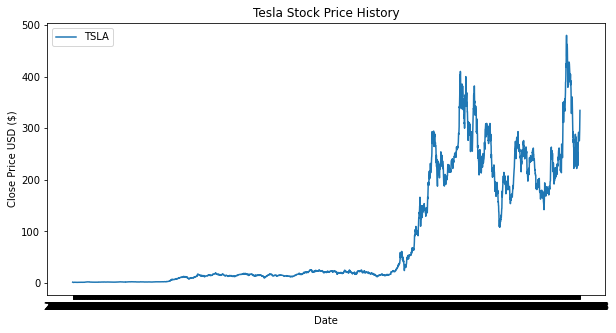

In [ ]:
import requests
import pandas as pd

api_key = '___'
symbol = 'TSLA'

url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}&serietype=line'
response = requests.get(url)
data = response.json()

tesla_data = pd.DataFrame(data['historical'])
tesla_data = tesla_data.sort_values('date')  # 날짜 순 정렬

make_graph(tesla_data, 'TSLA', 'Tesla Stock Price History')


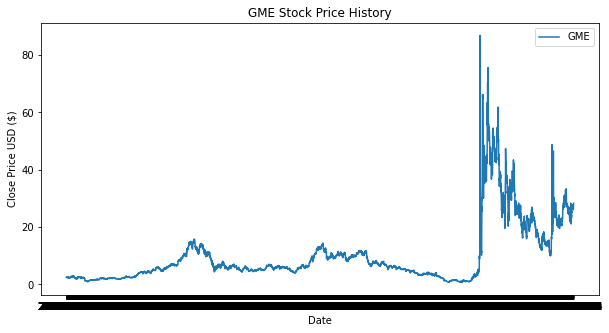

In [ ]:
import requests
import pandas as pd

api_key = '___'
symbol = 'GME'

url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}&serietype=line'
response = requests.get(url)
data = response.json()

tesla_data = pd.DataFrame(data['historical'])
tesla_data = tesla_data.sort_values('date')  # 날짜 순 정렬

make_graph(tesla_data, 'GME', 'GME Stock Price History')
